# Project 1 - Stress on a floating wind turbine

**Project deadline:** This project is due for submission on Wednesday, 11.05.2022, 23:59. Please check carefully the *About the Projects* section below for further details.

**Important:** You have the choice to work either on this project or on another one from Thomas. We strongly advise you to read through both project notebooks completely before you take a decision.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignmentts, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out six projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The projects needs to be submitted by uploading a modified version of this notebook to [Projects/Project 1](https://ecampus.uni-bonn.de/goto_ecampus_exc_2645968.html) on eCampus. Please only upload this notebook and no other files. You also do not need to change its filename before your upload. Your project must be on eCampus by Wednesday, 11.05.2022, 23:59. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Thomas and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

### Your Name here please:  
Ajay Shanmuga Sakthivasan

**Important Notes:**  
- No other file except the notebook is included with this submission, as requested in the "About the Projects" section.
- "Loading the data" section has been modified to load the csv file from the git repository on GitHub and therefore, an internet connection is required for this notebook to work. This is done because the necessary csv file for this notebook is not included with this submission. If the git repository is taken down, this notebook will not work. In that case, "Loading the data" section should be modified again to load a local version of the csv file.
- Some images might be broken in this notebook as images are not included with this submission.
- stats from scipy has been imported (in the modules import cell) to be used in a later part of the notebook. I'm mentioning this here as the, "Necessary Python packages" section lies above, "Your Tasks" section and this addition might go unnoticed.
- Cells marked \#EXTRA do not add to the solution to the problem, but they do help understanding the solutions better. They also expand on the primary solution and offer additional insights into the problem. I decided to include them with this notebook as they better describe my flow of thoughts while going about solving the problems.

# Floating wind turbines
Currently, the demand for renewable energy is very high. Wind turbines are very successful sources of renewable energy, and many states are planning new wind farms to increase the fraction of green energy in the overall consumption. Despite the high demand, it is difficult to establish large new onshore (land-based) wind farms due to space limitations: Attention has to be paid to landscape and neighbors.

The same constraints do not limit offshore wind farms. However, the conventional offshore wind turbine has a foundation which stands on the seafloor. The foundations are limited to a certain height, as the price and complexity of the foundation scales with the water depth. According to Wikipedia, fixed foundations can be installed at sea depth up to around 50 m.

This limits the possible wind farm locations to very few areas in the world where the ocean floor falls off relatively flatly away from the shore. 

Therefore, floating foundations are now being developed by many companies.

While floating wind turbine foundations may solve many problems related to installation of offshore wind, the technologies are still being tested. 

In this project you will work with simulated data measured for a floating foundation with a with a 15 MW wind turbine. For comparison, the standard offshore wind turbine is certified for on the order of 8 MW. Wind turbines in producing in the range of 15-20 MW are being pursued by many of the manufacturing companies. 


### This project
In this project, we will consider data from simulations of a floating 15 MW offshore turbine in operation. The data contains the values shown in this figure as a function of time. 


<img src="figs/windTurbinePicture1.png" width="400" height="200" />








## Necessary Python packages

In [59]:
# We need some modules (Python libraries) in the following.
# Usually, such modules are loaded in the first cell of a notebook.
# The modules that we need concern loading the data and plotting
# them later.

# all plots should appear directly within the notebook
%matplotlib inline

# modules necessary for plotting
import matplotlib.pyplot as plt

# seaborn just makes plots look a bit nicer - not
# absolutely necessary though.
import seaborn as sns
sns.set_style("whitegrid")

# modules to load the data. The Pandas module
# is just needed for a quick data-loading demonstration at the
# start of the Notebook. 
import pandas as pd

# module to make avilable data structures and routines
# for numerics
import numpy as np

# module to calculate the pearsonr value
from scipy import stats

# Loading the data
One great feature of `Python` is the ability to load all kinds of standardised data-formats into memory - in most cases with a single command. The data can be located on your disk or on the Web. 

You need to download the file "Bending moment tower bottom 15 MW offshore wind turbine.csv" from the github. 

In [60]:
filename = "https://raw.githubusercontent.com/terben/Programming_in_Python_BCGS_Summer_2022/master/lecture_04/data/Orcaflex%20Simulation%2C%2015%20MW%20wind%20turbine.csv"

data = pd.read_csv(filename, # Here we load the file
                   delimiter=';') # Delimiter tells how the rows are separated
data # print a preview of the data

,Orcaflex Simulation of 15 MW floating offshore wind turbine,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Time,Wind speed,Sea surface,Mooring force,Tilt,Nac. acc.,Tower mom.
2,(s),(m/s),(m),(kN),(deg.),(m/s2),(kNm)
3,0,32.98,0.47,7436.27,-5.56,-1.25,-806154.06
4,0.1,33.24,0.29,7457.32,-5.55,-1.25,-806570.1
...,...,...,...,...,...,...,...
35999,3599.6,52.96,0.39,5494.01,-4,-0.23,-518214.75
36000,3599.7,53.64,0.3,5510.76,-4,-0.21,-516202.25
36001,3599.8,54.17,0.21,5525.76,-4,-0.19,-514701.78
36002,3599.9,54.54,0.11,5539.14,-3.99,-0.18,-513763.14


\#Remark:  
csv file from the git repository on GitHub is used to load the data here

The data does not look as we want it to. The first line includes the name of the data, and the header is only in line 1. Therefore, we need to exclude the first few rows. 

The ```header``` argument tells the function which row contains the headers of the columns. The ```skiprows``` tells the function if some rows should be skipped. We will skip the row containing the units for now.

In [61]:
data = pd.read_csv(filename, delimiter = ';', header=2, skiprows=[3])
data

,Time,Wind speed,Sea surface,Mooring force,Tilt,Nac. acc.,Tower mom.
0,0.0,32.98,0.47,7436.27,-5.56,-1.25,-806154.06
1,0.1,33.24,0.29,7457.32,-5.55,-1.25,-806570.10
2,0.2,33.66,0.11,7475.07,-5.53,-1.24,-806385.89
3,0.3,34.23,-0.06,7489.50,-5.51,-1.23,-805549.79
4,0.4,34.95,-0.22,7500.62,-5.49,-1.21,-804060.69
...,...,...,...,...,...,...,...
35996,3599.6,52.96,0.39,5494.01,-4.00,-0.23,-518214.75
35997,3599.7,53.64,0.30,5510.76,-4.00,-0.21,-516202.25
35998,3599.8,54.17,0.21,5525.76,-4.00,-0.19,-514701.78
35999,3599.9,54.54,0.11,5539.14,-3.99,-0.18,-513763.14


We see that the data set contains
* Time in s
* Wind speed in m/s
* Sea surface offset from 'flat water' conditions in m. This is the wave height
* Mooring force in kN. This is the force on the anchor lines  
* Tilt in degrees
* Nacelle acceleration in m/s$^2$. The nacelle is the 'house' on top of the turbine where the rotor is attached
* Tower moment in kN m. This is the torque on from the tower moving with respect to the foundation.  

We make arrays out of the different columns. 

In [62]:
t = np.array(data['Time']) 
seaSurface = np.array(data['Sea surface'])
tilt = np.array(data['Tilt'])
mooring = np.array(data['Mooring force'])
nacAcc = np.array(data['Nac. acc.'])
towerMom = np.array(data['Tower mom.'])
windSpeed = np.array(data['Wind speed'])


We can now visualize the data. For instance the sea level. Run the cell to see the output.

Text(0, 0.5, 'Sea level (m)')

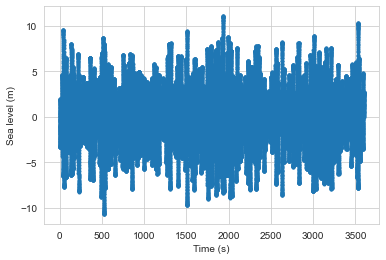

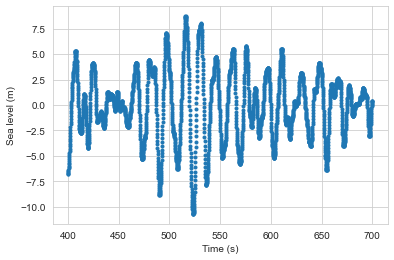

In [63]:

# We plot the sea level as a function of the time
plt.plot(t,seaSurface,'.')
plt.xlabel('Time (s)')
plt.ylabel('Sea level (m)')

#This looks a bit messy!

# Let's consider a small time window of 5 minutes = 300 s.
plt.figure()
plt.plot(t[(t>400) & (t<700)], seaSurface[(t>400) & (t<700)],'.')
plt.xlabel('Time (s)')
plt.ylabel('Sea level (m)')


We see that the system is subject to rather strong moments. We also see that it is useful to slice an array to a specific time window.

It may also later become useful to normalize two arrays to make it easier to compare them. Therefore, we define the following two functions:

In [64]:
def sliceArray(array, t, mintime, maxtime):
    # To slice in time we select only datapoints satisfying the greater than 
    # and smaller than requirements.
    slicedArray = array[(t>mintime) & (t<= maxtime)]
    return slicedArray

def normalizeArray(array):
    # To normalize an array, we subtract the minimum value 
    # and divide by the maximum value
    normalizedArray = (array-min(array))/max(array-min(array))
    return normalizedArray

# Your tasks
**Note:** Please continue this notebook and do all the following tasks within that notebook. Please comment appropriately all code-blocks and perform the necessary discussions of your results in Markup cells. All plots must have appropriate axes-labels and a title! Your project submission will consist of the modified notebook.

0. From looking at the figure where the different parameters are shown, which quantities would you expect to be correlated? (0 points, but give it a thought!)


1. Use the ```numpy``` functionality to find the maximum and minimum values and answer the following questions: How far above and below the normal sea level does the sea get? How far are these events from each other in time?  What is the maximal wind speed in km/h? What is the biggest moment experienced by the tower - do you think the sign matters in this case?

**Hint** you can use ```np.argmax``` and ```np.argmin``` or ```np.where``` to answer the time-difference question.



\#Task 0  
I would expect wind speed to be uncorrelated with any of the other quantities, since a wind turbine, by construction, is designed to align itself to achieve maximum efficiency irrespective of wind speed and wind direction.  
I would expect nacelle acceleration and tower moment to be correlated, as tower moment is just the force about the bottom axis and nacelle acceleration is at the top of the tower and perpendicular to the bottom axis.  
By a similar logic, I would expect sea surface elevation and mooring force to have weak correlation (since they are very close to the axis) with tower moment.  
I would expect tilt and tower moment to be correlated as well, at least weakly.  
Since this system has multiple quantitites that affect each other in a complicated way, it is not very easy to draw conclusions from the diagram.

In [65]:
#task 1
#maximum sea surface elevation
maxseasurface = np.max(seaSurface)
print("Maximum sea surface elevation = ", maxseasurface, "m")

#minimum sea surface elevation
minseasurface = np.min(seaSurface) 
print("Minimum height of the sea Surface = ", minseasurface, "m")

#indices of the maximum and minimum sea surface elevation
maxseasurfaceind = np.argmax(seaSurface)
minseasurfaceind = np.argmin(seaSurface)

#time difference between the maximum and minimum sea surface elevation
tdiffsse = t[maxseasurfaceind] - t[minseasurfaceind]
print("Time difference between the maximum and minimum sea surface elevation = ", tdiffsse, "s")

#maximum wind speed
maxwindspeed = np.max(windSpeed)
print("Maximum wind speed = ", maxwindspeed*18/5, "km/h") #18/5 is the conversion factor from m/s to km/h

#maximum moment expereinced by the tower
maxtowermomind = np.argmax(np.abs(towerMom))
print("Maximum tower moment = ", towerMom[maxtowermomind], "kNm")

#please check remarks in the next cell:)

Maximum sea surface elevation =  11.05 m
Minimum height of the sea Surface =  -10.69 m
Time difference between the maximum and minimum sea surface elevation =  1411.5 s
Maximum wind speed =  253.11599999999999 km/h
Maximum tower moment =  -1327809.46 kNm


**Remarks:**  
The sign matters in the case of sea surface elevation as it tells us how high or low the sea surface gets with respect to the sea level. Therefore, the most positive value of sea surface elevation tells us how high the sea surface gets with respect to the sea level and the most negative value of sea surface elevation tells us how low the sea surface gets with respect to the sea level.  
Wind speed is always positive as it is just the magnitude of wind velocity. Wind speed is the sensible quantity when it comes to wind turbines as wind turbines automatically align themselves with respect to the wind direction to achieve maximum efficiency.  
Whereas, the sign does not matter when it comes to tower moment as this tells us only whether the moment is clockwise or anticlockwise. That is, both the most positive and the most negative tower moments are going to affect the turbine equally but in the opposite directions.


2. Normalize and compare the different datasets to each other by plotting them together for a time window of your choice. It can be useful to separate the different plots with an offset as here:
```plt.plot(t,windSpeedNorm+0); plt.plot(t,seaSurfaceNorm+1)```
Does any of the datasets seem completely uncorrelated with the others? 

    We observe that the acceleration of the nacelle and the tower moment are correlated. Why do you think this is the case? How do you think it scales? 
    
    ***Hint:*** Which of Newton's laws would describe such a correlation?



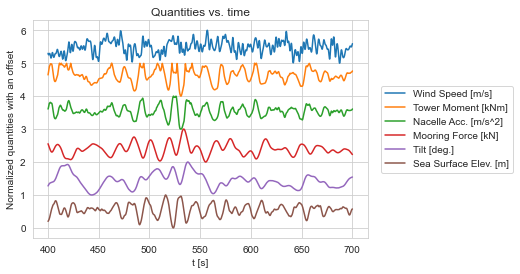

In [73]:
#task 2
#set the time window as t = 400s to t = 700s
#use sliceArray function to get the quantities in the required time window
#use normaliseArray function to normalaise the array
normseasurface = normalizeArray(sliceArray(seaSurface, t, 400, 700)) #normalise sea surface elev. for the set window
normtilt = normalizeArray(sliceArray(tilt, t, 400, 700)) #normalise tilt for the set window
normmooring = normalizeArray(sliceArray(mooring, t, 400, 700)) #normalise mooring for the set window
normacc = normalizeArray(sliceArray(nacAcc, t, 400, 700)) #normalise nacelle acc. for the set window
normtowermom = normalizeArray(sliceArray(towerMom, t, 400, 700)) #normalise tower moment for the set window
normwindspeed = normalizeArray(sliceArray(windSpeed, t, 400, 700)) #normalise wind speed for the set window

#time window for the plots
twindow = t[(t>400) & (t<=700)]

#plotting every normalised quantity with an offset vs the set time window
plt.plot(twindow,normwindspeed + 5, label = "Wind Speed [m/s]") #wind speed - time
plt.plot(twindow,normtowermom + 4, label = "Tower Moment [kNm]") #tower moment - time
plt.plot(twindow,normacc + 3, label = "Nacelle Acc. [m/s^2]") #nacelle acc. - time
plt.plot(twindow,normmooring + 2, label = "Mooring Force [kN]") #mooring - time
plt.plot(twindow,normtilt + 1, label="Tilt [deg.]") #tilt - time
plt.plot(twindow, normseasurface, label="Sea Surface Elev. [m]") #sea surface elev. - time
plt.xlabel('time [s]') #x axis title
plt.ylabel('Normalized quantities with an offset') #y axis title
plt.legend(loc = 'right', bbox_to_anchor=(1.45, 0.5)) #legends
plt.title("Quantities vs. time") #plot title
plt.show()

**Remarks:**  
It is obvious from the above plot that nacelle acceleration and tower moment are correlated, as suspected. This could be due to the face that nacelle acceleration causes a moment of force (tower moment) about the bottom point. This should obey Newton's second law, $\tau = I \cdot \alpha$, where $\alpha$ is quantified by _nacelle acceleration_ and $\tau$ is quantified by _tower moment_. This system can be roughly modelled as a massive object on top of a massive hollow cylinder, which then would let us calculate the moment of inertia about an axis passing through the bottom point and parallel to the bottom face. We do not get into the details of this, as this would be an interesting and extensive problem to be explored by itself.  
We see that wind speed is completely uncorrelated with every other quantity, again as expected.  
We also see that nacelle acceleration and mooring force are anticorrelated, although weakly, so do tower moment and mooring. We can also note nacelle acceleration and tilt to show very weak correlation, so do tower moment and tilt.  
We have a complicated system in which several quantites affect each other, as discussed earlier. This means it is not very straightforward to have two quantities have perfect correlation or anticorrelation. We should expect multiple quantities to show some degree of correlation.    
We explore correlation plots a little more in the next cell.

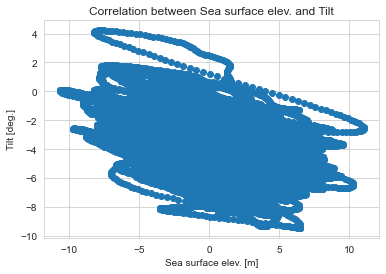

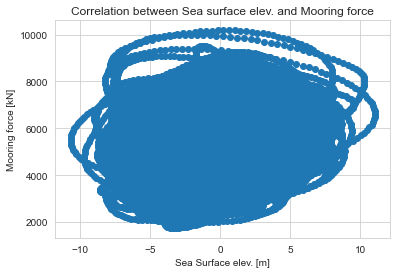

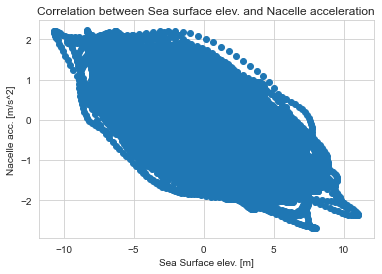

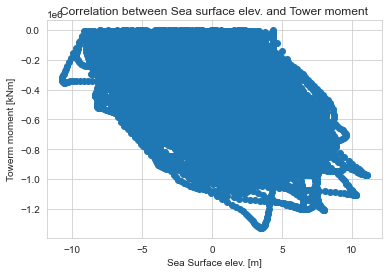

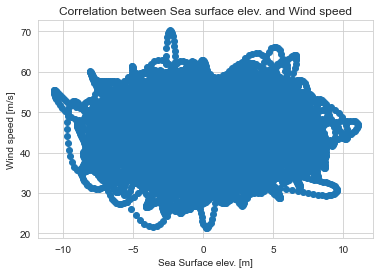

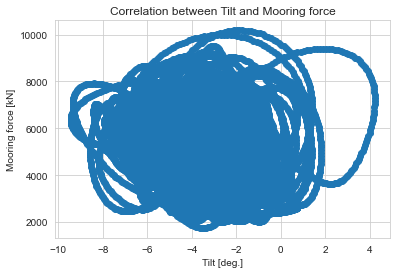

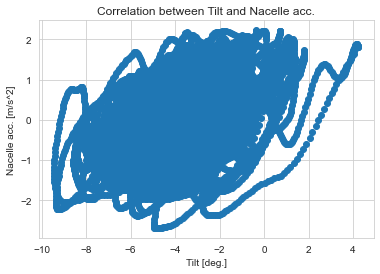

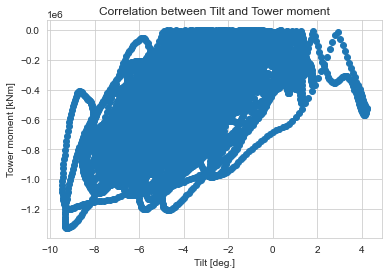

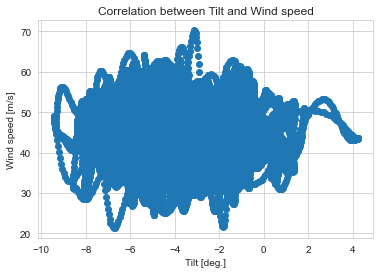

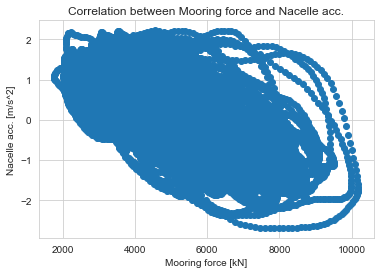

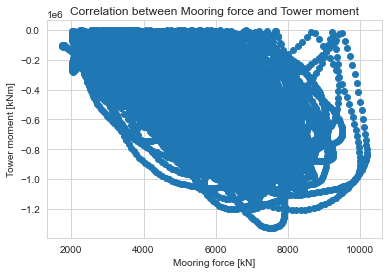

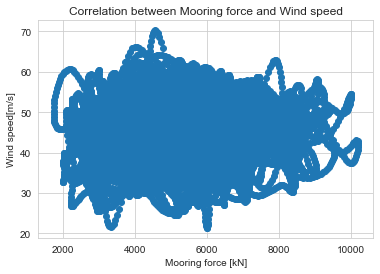

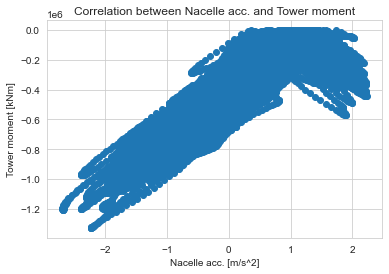

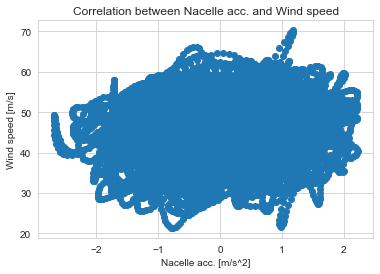

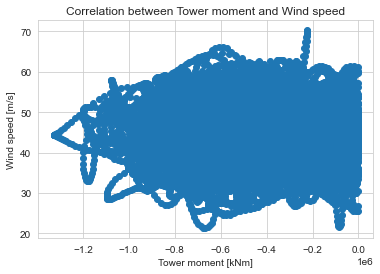

In [74]:
#EXTRA

#to better understand the correlation between different quantities, we plot individual scatter plots of the quantities
#sea surface elev. vs. tilt
#all the plots follow the same format as below, it is to be understood that the comments are ditto
plt.scatter(seaSurface, tilt) #scatter plot
plt.xlabel('Sea surface elev. [m]') #x axis title
plt.ylabel('Tilt [deg.]') #y axis title
plt.title('Correlation between Sea surface elev. and Tilt') #plot title
plt.show()

#sea surface elev. vs. mooring
plt.scatter(seaSurface, mooring)
plt.xlabel('Sea Surface elev. [m]')
plt.ylabel('Mooring force [kN]')
plt.title('Correlation between Sea surface elev. and Mooring force')
plt.show()

#sea surface elev. vs. nacelle acc.
plt.scatter(seaSurface, nacAcc)
plt.xlabel('Sea Surface elev. [m]')
plt.ylabel('Nacelle acc. [m/s^2]')
plt.title('Correlation between Sea surface elev. and Nacelle acceleration')
plt.show()

#sea surface elev. vs. tower moment
plt.scatter(seaSurface, towerMom)
plt.xlabel('Sea Surface elev. [m]')
plt.ylabel('Towerm moment [kNm]')
plt.title('Correlation between Sea surface elev. and Tower moment')
plt.show()

#sea surface elev. vs. wind speed
plt.scatter(seaSurface, windSpeed)
plt.xlabel('Sea Surface elev. [m]')
plt.ylabel('Wind speed [m/s]')
plt.title('Correlation between Sea surface elev. and Wind speed')
plt.show()

#tilt vs. mooring
plt.scatter(tilt, mooring)
plt.xlabel('Tilt [deg.]')
plt.ylabel('Mooring force [kN]')
plt.title('Correlation between Tilt and Mooring force')
plt.show()

#tilt vs. nacelle acc.
plt.scatter(tilt, nacAcc)
plt.xlabel('Tilt [deg.]')
plt.ylabel('Nacelle acc. [m/s^2]')
plt.title('Correlation between Tilt and Nacelle acc.')
plt.show()

#tilt vs. tower moment
plt.scatter(tilt, towerMom)
plt.xlabel('Tilt [deg.]')
plt.ylabel('Tower moment [kNm]')
plt.title('Correlation between Tilt and Tower moment')
plt.show()

#tilt vs. wind speed
plt.scatter(tilt, windSpeed)
plt.xlabel('Tilt [deg.]')
plt.ylabel('Wind speed [m/s]')
plt.title('Correlation between Tilt and Wind speed')
plt.show()

#mooring vs. nacelle acc.
plt.scatter(mooring, nacAcc)
plt.xlabel('Mooring force [kN]')
plt.ylabel('Nacelle acc. [m/s^2]')
plt.title('Correlation between Mooring force and Nacelle acc.')
plt.show()

#mooring vs. tower moment
plt.scatter(mooring, towerMom)
plt.xlabel('Mooring force [kN]')
plt.ylabel('Tower moment [kNm]')
plt.title('Correlation between Mooring force and Tower moment')
plt.show()

#mooring vs. wind speed
plt.scatter(mooring, windSpeed)
plt.xlabel('Mooring force [kN]')
plt.ylabel('Wind speed[m/s]')
plt.title('Correlation between Mooring force and Wind speed')
plt.show()

#nacelle acc. vs tower moment
plt.scatter(nacAcc, towerMom)
plt.xlabel('Nacelle acc. [m/s^2]')
plt.ylabel('Tower moment [kNm]')
plt.title('Correlation between Nacelle acc. and Tower moment')
plt.show()

#nacelle acc. vs wind speed
plt.scatter(nacAcc, windSpeed)
plt.xlabel('Nacelle acc. [m/s^2]')
plt.ylabel('Wind speed [m/s]')
plt.title('Correlation between Nacelle acc. and Wind speed')
plt.show()

#wind speed vs tower moment
plt.scatter(towerMom, windSpeed)
plt.xlabel('Tower moment [kNm]')
plt.ylabel('Wind speed [m/s]')
plt.title('Correlation between Tower moment and Wind speed')
plt.show()

**Remarks:**  
The individual scatter plots leads us to the following suspicions.  
_Strongly correlated_:  
- Nacelle acceleration and tower moment  

_(Weakly) correlated_:  
- Tilt and tower moment
- Tilt and nacelle acc.  

_(Weakly) anticorrelated_:  
- Sea surface elev. and tilt
- Sea surface elev. and nacelle acc.
- Sea surface elev. and tower moment
- Mooring force and nacelle acc.
- Mooring force and tower moment  

_No correlation_:  
- Sea surface elevation and mooring force
- Sea surface elev. and wind speed
- Tilt and mooring force
- Tilt and wind speed
- Mooring force and wind speed
- Nacelle acc. and wind speed
- Tower moment and wind speed 



3. We will test whether the datasets are correlated by calculating the correlation between them. 

    The correlation between two parameters can be estimated with the correlation coefficient, which depends on the covariance. 
    The covariance is defined as
    
    \begin{align}
    \mathrm{cov}(X_1, X_2) = \left\langle(X_1-\langle X_1 \rangle) \cdot ( X_2-\langle X_2 \rangle )\right\rangle
    \end{align}
    
    where we use $\langle \cdots \rangle$ as the expectation value, such that $\langle X_1 \rangle$ is the mean of the variable $X_1$. Note how the covariance resembles to the variance $\mathrm{var}(X_1) = \left\langle(X_1-\langle X_1 \rangle)^2 \right\rangle$.
    
    The covariance between $X_1$ and $X_2$ describes to how large a degree the variation of $X_1$ and $X_2$ is related. To compare covariances it is sensible to normalize with the variances of the two parameters. This gives us the correlation coefficient, which is defined as 
        
    \begin{align}
    \mathrm{corr}(X_1, X_2) = \frac{\left\langle(X_1-\langle X_1 \rangle) \cdot ( X_2-\langle X_2 \rangle )\right\rangle}{\sqrt{\mathrm{var}(X_1)}\cdot \sqrt{\mathrm{var}(X_2)}}
    \end{align}
    
    A correlation parameter close to 1 means that the variation of $X_1$ and $X_2$ is strongly correlated. A value close to zero means that the parameters are not varying together. A value close to -1 means that they are anti-correlated: If one goes up, the other one goes down, so to say.

    Calculate the correlation parameter and find
    - the parameters which are most and least related to the sea surface level.
    - the parameters which are most and least related to tower moment.
    
    Are you surprised by the result?

In [78]:
#task3
#function to calculate the correlation coefficient between two datasets
def corrcoeff (x1,x2):
    """
    This function takes in two arrays of the same size and gives the correlation coefficient between the two datasets(arrays)
    """
    #we implement the given formula to calculate the correlation coefficient
    #numerator
    mx1 = x1 - np.mean(x1)
    mx2 = x2 - np.mean(x2)
    covar =np.mean(mx1*mx2) #covariance of the two datasets
    #denominator squared
    varx1 = np.mean(mx1**2) #variance of the first dataset 
    varx2 = np.mean(mx2**2) #variance of the second dataset
    #correlation coefficient 
    corr = covar/(np.sqrt(varx1)*np.sqrt(varx2)) #implement the formula
    return corr #return correlation coefficient

#sea surface elev. correlation
#we just call the function corrcoeff() with the respective quantitites
print("Correlation coefficient betweens sea surface elevation and")
print("Tilt:", corrcoeff(seaSurface, tilt))
print("Mooring:", corrcoeff(seaSurface, mooring))
print("Nacelle Acceleration:", corrcoeff(seaSurface, nacAcc))
print("Tower Moment:", corrcoeff(seaSurface, towerMom))
print("Wind Speed:", corrcoeff(seaSurface, windSpeed))
print("-------------------------")
#tower moment correlation
#we just call the function corrcoeff() with the respective quantitites
print("Correlation coefficient between tower moment and")
print("Sea surface elev.:", corrcoeff(towerMom, seaSurface))
print("Tilt:", corrcoeff(towerMom, tilt))
print("Mooring force:", corrcoeff(towerMom, mooring))
print("Nacelle Acceleration:", corrcoeff(towerMom, nacAcc))
print("Wind speed:", corrcoeff(towerMom, windSpeed))
print("-------------------------")

Correlation coefficient betweens sea surface elevation and
Tilt: -0.3961419648815372
Mooring: 0.13465198247473426
Nacelle Acceleration: -0.6212418534160657
Tower Moment: -0.5385091854754052
Wind Speed: 0.02581689806421358
-------------------------
Correlation coefficient between tower moment and
Sea surface elev.: -0.5385091854754052
Tilt: 0.6099168579631556
Mooring force: -0.6455875936823036
Nacelle Acceleration: 0.9047304290585231
Wind speed: -0.021849130317860725
-------------------------


**Remarks**:  
Quantities that are correlated to sea surface elev. (decreasing order of correlation):
- Nacelle acc. (weakly anti-correlated)
- Tower moment (weakly anti-correlated)
- Tilt (weakly anti-correlated)

Quantities that are not correlated to sea surface elev. (decreasing order of correlation):
- Mooring force
- Wind speed

Quantities that are correlated to tower moment (decreasing order of correlation):
- Nacelle acc. (strongly correlated)
- Mooring force (weakly anti-correlated)
- Tilt (weakly correlated)
- Sea surface elev. (weakly anti-correlated)

Quantities that are not correlated to tower moment (decreasing order of correlation):
- Wind speed  
  
This does not come out as a surprise to me, as this just confirms my suspicions from the individual scatter plots. But physically, it is surprising to see sea surface elevation being correlated to nacelle acceleration. My guess is that sea surface elevation causes a moment about the base point which shows up as a weak correlation with nacelle acceleration. Since nacelle acceleration and tower moment are very strongly correlated, any quantity that is correlated to either nacelle acceleration or tower moment, must also be correlated to the other. Tower moment seems to be correlated with every other quantity, barring wind speed, which makes sense physically, as tower moment is just a moment of (any) force about a point. Wind speed not being correlated is not a surprise to me, as I explained earlier.  
We calculate the correlation coefficient using an in-built function to cross-check our values in the next cell.

In [81]:
#EXTRA

#calculate Pearson-R and p-value to cross-check with our results
#use scipy.stats for this
print("The following data contains two values:")
print("The first value is the actual correlation coefficient between the two datasets.")
print("The second value is the p-value, which is a measure of significance. It is the probability of obtaining the given correlation \
for the datasets, assuming there is no correlation")

#calculate Pearson-R and p-value using stats.pearsonr()
#following print-blocks have a similar format, it is to be understood that the comments are ditto

#print-block no. 1
print("-------------------------")
print("Correlation coefficient between wind speed and")
print("Tower moment: ", stats.pearsonr(windSpeed, towerMom)) #wind speed - tower mom correlation coeff and p-value
print("Nacelle acceleration: ", stats.pearsonr(windSpeed, nacAcc)) #wind speed - nac acc. correlation coeff and p-value
print("Mooring force: ", stats.pearsonr(windSpeed, mooring)) #wind speed - mooring force correlation coeff and p-value
print("Tilt: ", stats.pearsonr(windSpeed, tilt)) #wind speed -tilt correlation coeff and p-value
print("Sea surface elevation: ", stats.pearsonr(windSpeed, seaSurface)) #wind speed - sea surface elev. correlation coeff and p-value

#print-block no. 2
print("-------------------------")
print("Correlation coefficient between Tower moment and")
print("Nacelle acceleration: ", stats.pearsonr(towerMom, nacAcc))
print("Mooring force: ", stats.pearsonr(towerMom, mooring))
print("Tilt: ", stats.pearsonr(towerMom, tilt))
print("Sea surface elevation: ", stats.pearsonr(towerMom, seaSurface))

#print-block no. 3
print("-------------------------")
print("Correlation coefficient between Nacelle acceleration and")
print("Mooring force: ", stats.pearsonr(nacAcc, mooring))
print("Tilt: ", stats.pearsonr(nacAcc, tilt))
print("Sea surface elevation: ", stats.pearsonr(nacAcc, seaSurface))

#print-block no. 4
print("-------------------------")
print("Correlation coefficient between Mooring force and")
print("Tilt: ", stats.pearsonr(mooring, tilt))
print("Sea surface elevation: ", stats.pearsonr(mooring, seaSurface))

#print-block no. 5
print("-------------------------")
print("Correlation coefficient between Tilt and")
print("Sea surface elevation: ", stats.pearsonr(tilt, seaSurface))


The following data contains two values:
The first value is the actual correlation coefficient between the two datasets.
The second value is the p-value, which is a measure of significance. It is the probability of obtaining the given correlation for the datasets, assuming there is no correlation
-------------------------
Correlation coefficient between wind speed and
Tower moment:  (-0.021849130317860725, 3.383493130082349e-05)
Nacelle acceleration:  (0.13417314878953804, 3.0677548814913954e-144)
Mooring force:  (0.037732524997083336, 7.971507136097151e-13)
Tilt:  (-0.028229423037631457, 8.456253514011796e-08)
Sea surface elevation:  (0.025816898064213587, 9.626368343975228e-07)
-------------------------
Correlation coefficient between Tower moment and
Nacelle acceleration:  (0.9047304290585232, 0.0)
Mooring force:  (-0.6455875936823035, 0.0)
Tilt:  (0.6099168579631558, 0.0)
Sea surface elevation:  (-0.5385091854754054, 0.0)
-------------------------
Correlation coefficient between Nac

**Remarks:**  
We see that the correlation coefficients match. The p-value is significantly low for almost every correlation between datasets. To better visualise the data, we construct a table containing the correlation coefficients between different quantities and also a heatmap.

Table of correlation coefficients betweeen different quantities (rounded to two digits)
               Wind speed  Sea surface  Mooring force  Tilt  Nac. acc.  \
Wind speed           1.00         0.03           0.04 -0.03       0.13   
Sea surface          0.03         1.00           0.13 -0.40      -0.62   
Mooring force        0.04         0.13           1.00 -0.19      -0.64   
Tilt                -0.03        -0.40          -0.19  1.00       0.44   
Nac. acc.            0.13        -0.62          -0.64  0.44       1.00   
Tower mom.          -0.02        -0.54          -0.65  0.61       0.90   

               Tower mom.  
Wind speed          -0.02  
Sea surface         -0.54  
Mooring force       -0.65  
Tilt                 0.61  
Nac. acc.            0.90  
Tower mom.           1.00  


<AxesSubplot:>

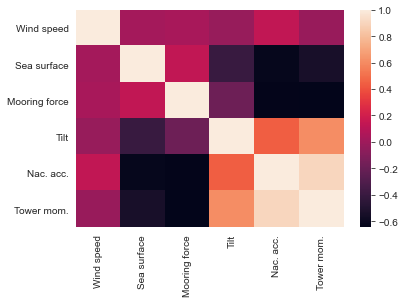

In [83]:
#EXTRA

dataquantities = data.loc[:, data.columns != 'Time'] #consider all columns except time
correlationcoeffall = dataquantities.corr() #use corr() to calculate correlation coefficients

print("Table of correlation coefficients betweeen different quantities (rounded to two digits)") #print a table containing the correlation coefficients
print(round(correlationcoeffall, 2)) #round correlation coefficients to 2 digits for legibility

sns.heatmap(correlationcoeffall) #plot a heatmap of the table

4. In exercise 1 we found the minima and maxima of the sea height and we investigated how far apart the deepest through and the highest peak were.
    In stability analysis the maximal values are not always of immediate interest, because these values may only appear very far apart in time. Instead it may be more interesting to consider how many small cycles some parameter performs. 

- For the mooring force, find all the local minima and maxima for the mooring force time series between t = 0 s and t = 2000 s. You will see methods for doing this in the lecture review.
- Make a histogram of the difference in force between each minima and maxima. Remember to do this on both sides of a peak. The figures below show the first four differences to calculate for the interval from 400 s to 700 s, and a histogram with 10 bins of the forces. Use the histogram to check your method and create a histogram for the mooring force time series between t = 0 s and t = 2000 s.
- Compare the histogram with the difference between the global maximum and global minimum and comment.



<img src="figs/mooringForceMaxMinHistogram.png" width=800px/>



In [95]:
#task4
def locext(X):
    """
    This function takes an array as input and returns two arrays - 
    an array containing the indices of all the local maxima,
    and and array containing the indices of all the local minima, in that order.
    """
    #check if a point is a maximum -- it should be greater than both its neighbouring points
    maximaind = np.where((X[1:-1] >= X[:-2]) & (X[1:-1] >= X[2:]))[0] + 1
    #check if a point is a minimum -- it should be lesser than both its neighbouring points
    minimaind = np.where((X[1:-1] <= X[:-2]) & (X[1:-1] <= X[2:]))[0] + 1
    #we are adding 1 to all the indices because of the way we are slicing the arrays -
    #we are omitting the first element and therefore the second element of the old array becomes the first element of the new (sliced) array
    #but when we calculate the values at a later point for the old (unsliced) array, there will be an offset
    #this offset is eliminated by adding 1 to all the indices
    
    #return the arrays containing the indices of maxima and minima
    return maximaind, minimaind

def diffext(X, maximaind, minimaind):
    """
    This function takes in four arrays as input- 
    an arbitrary array, an array containing the indices of local maxima and an array containing the indices of local minima.
    And this function gives an array containing the differences in values of the consecutive local extrema.
    This function is better used in combination with the function locext().
    Note that the function requires the difference between the sizes of the array of local maxima and local minima to be either -1, 0 or 1.
    """

    #we consider four cases here
    #the number of maxima can be one more or one less than the number of minima
    #or the number of maxima can be equal to the number of minima    

    #case 1: number of maxima one more than number of minima
    #this is possible only if the first and last extrema are maxima
    #in this case, we pick every locmin element and subtract it from it's neighbouring maxima (one to the left and one to the right) 
    if len(maximaind) > len(minimaind):
        a = X[maximaind[:-1]] - X[minimaind] #subtract the maximum to the left of every minimum
        b = X[maximaind[1:]] - X[minimaind] #subtract the maximum to the right of every minimum
        c = np.append(a,b) #create a new array containing all the differences
    
    #case 2: number of maxima one less than number of minima
    #this is possible only if the first and last extrema are minima
    #in this case, we pick every locmax element and subtract it's neighbouring minima (one to the left and one to the right) from it 
    elif len(maximaind) < len(minimaind):
        a = X[maximaind] - X[minimaind[:-1]] #subtract the minimum to the left of every maximum
        b = X[maximaind] - X[minimaind[1:]] #subtract the minimum to the right of every maximum
        c = np.append(a,b) #create a new array containing all the differences
    
    #case 3: number of maxima equals number of minima
    #this has two further subcases - a maximum occurs before a minimum or a minimum occurs before a maximum
    #if a maximum occurs before a minimum, we proceed similar to case 1,
    #except that we note that the last extremum, which is a minimum, has only one maximum to its left. Hence we slice it accordingly
    #if a minimum occurs before a maximum, we proceed similar to case 2,
    #except that we note that the last extremum, which is a maximum, has only one minimum to its left. Hence we slice it accordingly
    else:
        if maximaind[0] < minimaind[0]: #check if a maximum occurs before a minimum
            a = X[maximaind] - X[minimaind] #subtract the maximum to the left of every minimum
            b = X[maximaind[1:]] - X[minimaind[:-1]] #subtract the maximum to the right of every minimum, except for the final minimum
            c = np.append(a,b) #create a new array containing all the differences
        else: #if a minimum occurs before a maximum
            a = X[maximaind] - X[minimaind] #subtract the minimum to the left of every maximum
            b = X[maximaind[:-1]] - X[minimaind[1:]] #subtract the minimum to the right of every maximum, except for the final maximum
            c = np.append(a,b) #create a new array containing all the differences
    
    #return the array containing the differences between consecutive extrema
    return c

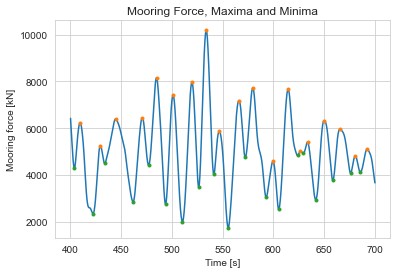

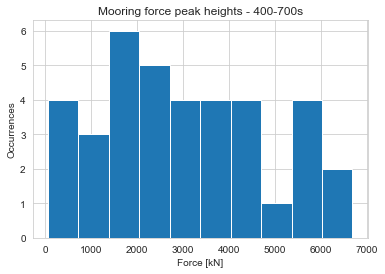

In [96]:
#now we test our functions against the plots given in the problem as an example (t>400 & t<=700)
smooring = sliceArray(mooring, t, 400, 700) #mooring values for the set window
stime = sliceArray(t, t, 400, 700) #time values for the set window

maxind, minind = locext(smooring)
locdiff = diffext(smooring, maxind, minind)

plt.plot(stime, smooring,'-') #plot mooring vs time for the set window
plt.plot(stime[maxind], smooring[maxind], '.') #plot the maxima points vs time
plt.plot(stime[minind], smooring[minind], '.') #plot the minima points vs time
plt.xlabel('Time [s]') #x axis title
plt.ylabel('Mooring force [kN]') #y axis title
plt.title('Mooring Force, Maxima and Minima') #plot title
plt.show()

plt.hist(locdiff, bins = 10) #histogram of differences of extrema
plt.xlabel('Force [kN]') #x axis title
plt.ylabel('Occurrences') #y axis title
plt.title('Mooring force peak heights - 400-700s') #histogram title
plt.show()

We see that the plots obtained here match with the plots given in the problem. This means our code is working properly (at least for this case).

List of local maxima:  [ 7515.09  5672.46  5775.28  8395.55  6208.28  7442.05  5367.41  5303.48
  5332.21  7171.48  8245.2   6273.93  6659.96  5538.92  5035.37  6392.78
  6820.1   6573.77  5422.92  6445.9   4725.3   5061.98  6136.66  4825.12
  6064.9   8003.91  5962.3   7912.96  6243.23  5261.47  6400.02  6454.54
  8156.73  7413.21  7965.25 10186.5   5875.08  7186.95  7726.79  4597.8
  7672.57  5010.8   5407.66  6329.94  5969.62  4830.17  5111.11  6096.05
  5852.29  5672.42  7387.99  6847.52  5768.24  7132.48  6104.29  8667.71
  7807.91  6646.14  5339.3   6759.68  5590.38  5650.02  5743.26  7297.33
  7390.65  5447.05  6810.36  6695.85  5234.27  6831.79  5477.16  4196.92
  6957.05  6174.31  5976.76  5528.69  6144.07  6340.75  7187.72  5720.08
  5370.53  5637.52  5637.46  5292.68  7035.68  6328.21  7340.85  8453.13
  8862.79  4572.15  3751.37  3871.85  7292.65  6493.81  5945.8   8242.21
  5148.42  7399.45  7307.66  5427.7   5439.75  8725.98  9101.68  5499.94
  6383.5   5213.52  4733.13  

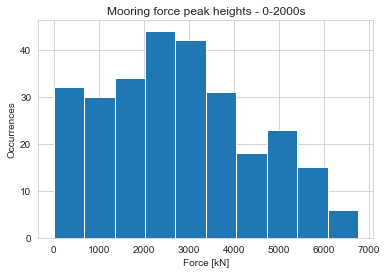

In [102]:
smooring2 = sliceArray(mooring, t, 0, 2000) #mooring values for t>0 & t<=2000
stime2 = sliceArray(t, t, 0, 2000) #time values for t>0 & t<=2000

maxind2, minind2 = locext(smooring2) #call the function to find out local maxima and minima for smooring2
locdiff2 = diffext(smooring2, maxind2, minind2) #call the function to calculate the extrema differences

print("List of local maxima: ", smooring2[maxind2]) #list of local maxima
print("List of local minima: ", smooring2[minind2]) #list of local minima

plt.hist(locdiff2, bins = 10) #histogram of differences of extrema
plt.xlabel('Force [kN]') #x axis title
plt.ylabel('Occurrences') #y axis title
plt.title('Mooring force peak heights - 0-2000s') #plot title
plt.show()

In [103]:
#difference between global maximum and minimum in the time window 0-2000s
print("Difference between global maximum and global minimum (Mooring force) in the time window 0-2000s = ", max(smooring2) - min(smooring2), "kN")

#difference between global maximum and minimum in the overall dataset
print("Difference between global maximum and global minimum (Mooring force) = ", max(mooring) - min(mooring), "kN")

Difference between global maximum and global minimum (Mooring force) in the time window 0-2000s =  8439.46 kN
Difference between global maximum and global minimum (Mooring force) =  8439.46 kN


**Remarks:**  
In the previous cell, I have calculated the differences between the global maximum and global minimum for the time window 0-2000s and for the total time window separately. Comparing the difference between the global maximum and global minimum for the time window 0-2000s and the histogram for the same time window seemed more sensible to me(Rather than comparing the difference between overall global maximum and global minimum and the histogram for a smaller time window). Luckily, both the global maximum and global minimum of the overall period lie within the smaller window 0-2000s.  
We notice that the difference between the global maximum and global minimum is much higher and it does not belong to any of the bins in the histogram. It lies farther to the right of the histogram on the plot. This tells us that the system is not simple harmonic and involves a lot of harmonics. This is a characteristic of a dynamical system with a lot of interacting quantities. But this test does not tell us anything about the periodicity of the quantity.  
We also notice that the most of the differences lie around $3000 kN$ and this definitely is much smaller than the calculated global difference $(=8439.46 kN)$. This also implies that while designing such a system we don't have to worry as much about the effect of this particular quantity on the system, as the quantitiy varies much less in smaller time frames.  

5. We would like to dimension the tower on the basis of the maximum tower bottom moment. 
    The tower is a hollow steel cylinder with an outer diameter of 10 m and a wall thickness T. 

    The bending stress in a hollow cylinder is
    \begin{align}
    s = \frac{M_b}{W}
    \end{align}
    where $s$ is the stress, $M_b$ is the maximum bending moment, and $W$ is the moment of resistance. 
    The bending stress needs to be lower than the maximum allowable stress. For the common steel type, FE 510, the maximum allowable stress is 345 MPa. 

    The moment of resistance for a hollow cylinder is
    \begin{align}
    W = \frac{\pi}{64}\frac{D_o^4 – D_i^4}{D_o}
    \end{align}
    where $D_o$ is the outer diameter and $D_i$ is the inner diameter. 

    Write a function that returns the minimum allowable wall thickness T of the tower for a given maximum stress and calculate for the maximum stress recorded during the one hour simulation period.
    Does the result surprise you?
    

\#task5  
We would like to calculate the minimum thickness of the tower, given a maximum bending moment. We model the system as a hollow cylinder and use the formulas given in the problem statement.  
The maximum allowable stress for the given material, $s$ is $345 Mpa$. Then we have,
$$
    s = \frac{M_b}{W} < 345 Mpa
$$
where, $M_b$ is the maximum bending moment and $W = \frac{\pi}{64}\frac{D_o^4 - D_i^4}{D_o}$ is the moment of resistance with $D_o$ being the outer diameter and $D_i$ being the inner diameter. Therefore we have,
$$
    W > \frac{M_b}{345[Mpa]} \\
    \implies \frac{\pi}{64}\frac{D_o^4 - D_i^4}{D_o} > \frac{M_b}{345[Mpa]} \\
    \implies D_i < \sqrt[4]{D_o^4 - \frac{64 \cdot D_0 \cdot M_b}{\pi \cdot 345[Mpa]}} \\
$$
Using $\frac{1}{2}(D_o - D_i) = T$, where $T$ is the thickness and rewriting $M_b$ in terms of $kNm$ we get,
$$
    T = \frac{1}{2}(D_o - D_i) > \frac{1}{2}\left(D_o - \sqrt[4]{D_o^4 - \frac{64 \cdot D_0 \cdot M_b[kNm] \cdot 10^3}{\pi \cdot 345 \cdot 10^6}} \right)
$$

In [104]:
#task5
def minthick(stress, dout):
    """
    This function takes in the stress on a hollow cylinder in kNm (moment of force about an axis), outer diameter in m
    and returns the minimum thickness of the cylinder in m.
    FE510 steel type has been considered for the maximum allowable stress value.
    """
    #the formula is implemented over multiple lines to improve legibility
    val1 = (stress*10**3*dout*64)/(345*10**6*np.pi)
    val2 = dout**4 - val1
    val3 = val2**(1/4)
    t = (1/2)*(dout - val3)
    return t

tm = np.max(np.abs(towerMom))
print("Minimum allowable wall thickness for the given max tower moment = ", minthick(tm, 10), "m")

Minimum allowable wall thickness for the given max tower moment =  0.10102788019764652 m


**Remarks:**  
When taken at its face value (a hollow cylinder with a thickness of $10cm$), this result is not surprising. But, this result is surprising considering the fact the outer diameter is $10m$. The thickness is just $1\%$ of the outer diameter. This is surprising when I think about the enormous forces the tower has to withstand. But again, the material chosen here has a very high resistance to breaking. There are other points at which this system can fail (e.g, at the bottom of the tower), if not designed properly.

## Additional information - not related to programming per se

For more information on floating wind turbines, see

https://en.wikipedia.org/wiki/Floating_wind_turbine

This promotional video shows the installation of a 3.6 MW demonstration turbine on a floating foundation https://dock90.com/tetraspar/

The data used in this project was calculated in https://www.orcina.com/orcaflex/ and kindly shared by the TetraSpar Demo team.

**Final Remarks:**  
Some parts of the code (at least the logic behind certain functions) might resemble Vlera's codes as we discussed this project and solved it together. I would be happy to explain every part of the code, if that's necessary:)